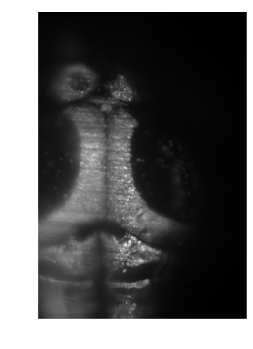

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from thunder import KMeans, NMF, PCA, RegressionModel, Colorize,Registration
import numpy as np
import scipy.io
from numpy import amin, amax, ravel, sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
image = Colorize.image
sns.set_context('notebook')
sns.set_style('ticks')

norm = tsc.loadImages('/mnt/downloads/20150507crop/1/', inputFormat='tif')
reg = Registration('crosscorr')
reg.prepare(norm, startIdx=0, stopIdx=30)
image(reg.reference)

In [3]:
model = reg.fit(norm)
model

RegistrationModel
500 transformations
registration method: CrossCorr
transformation type: Displacement

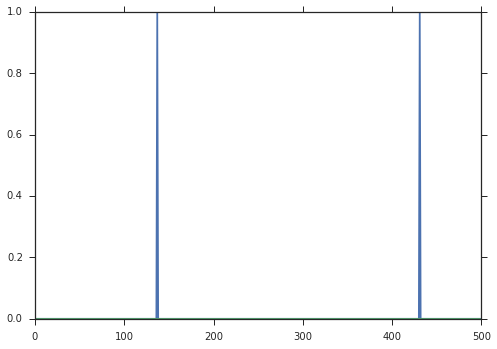

In [5]:
clrs = sns.color_palette('deep')
plt.plot(model.toArray()[:,0], color=clrs[0])
plt.plot(model.toArray()[:,1], color=clrs[1])

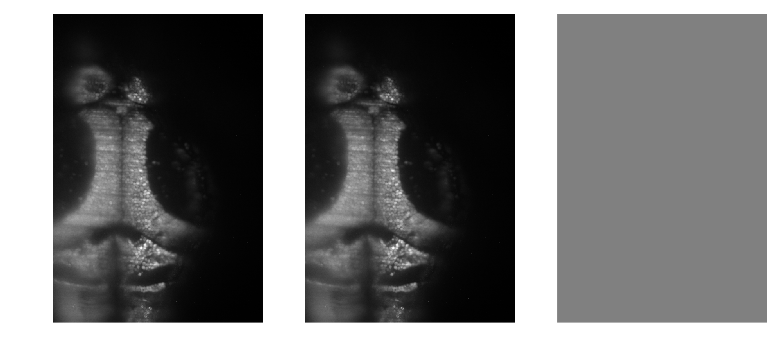

In [6]:
corrected = model.transform(norm)
im1 = norm[0]
im2 = corrected[0]

sns.set_context('poster')
plt.subplot(1, 3, 1)
image(im1)
plt.subplot(1, 3, 2)
image(im2)
plt.subplot(1, 3, 3)
image(im1 - im2, clim=(-200, 200))
sns.set_context('notebook')

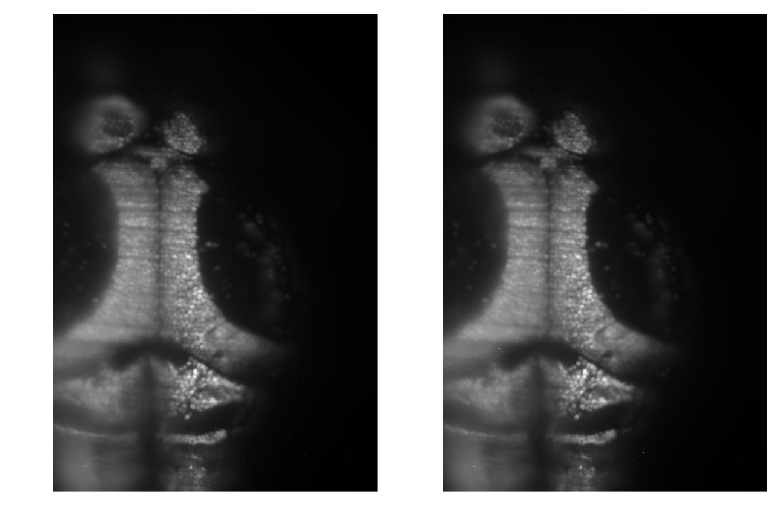

In [7]:
sns.set_context('poster')
plt.subplot(1, 2, 1)
image(norm.mean())
plt.subplot(1, 2, 2)
image(corrected.mean())
sns.set_context('notebook')

NameError: name 'center' is not defined

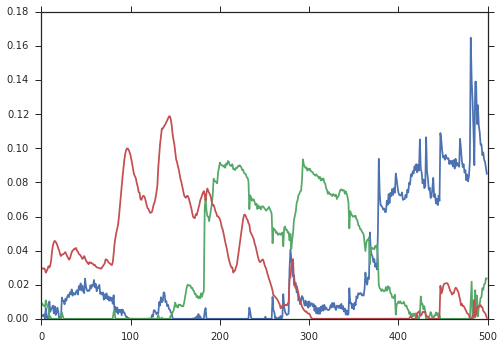

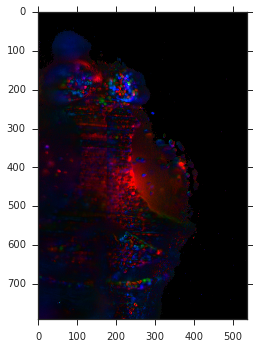

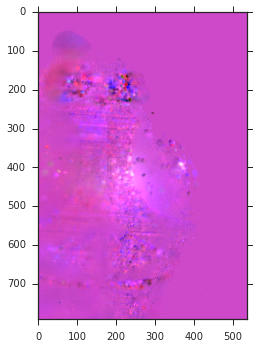

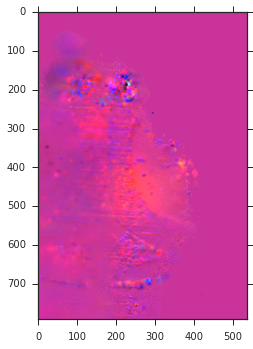

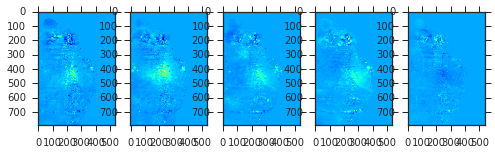

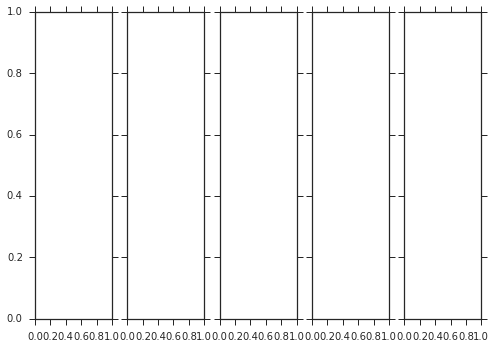

In [14]:
test = np.zeros((5,500),dtype=np.int)
test[0,85:100]=1
test[1,130:145]=1
test[2,175:190]=1
test[3,220:235]=1
test[4,305:315]=1
test[4,325:335]=1
test[4,350:360]=1
test[4,370:380]=1
test[4,395:415]=1
norm = norm.toTimeSeries(size="64M")
norm=norm.squelch(1300).normalize(baseline='percentile')
norm.cache()
fig = figure(dpi=300)
model = NMF(k=3, maxIter=30).fit(norm)
plt.plot(model.h.T);
plt.savefig('/mnt/downloads/temp/NMF-1.png', dpi=300, bbox_inches='tight')
imgs = model.w.pack()
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"], scale=2).transform(imgs)
plt.imshow(maps);
plt.savefig('/mnt/downloads/temp/NMFb-1.png', dpi=300, bbox_inches='tight')
model = RegressionModel.load(test, "linear")
results = model.fit(norm)
betas=results.select('betas').pack()
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[0:3])
plt.imshow(maps)
plt.savefig('/mnt/downloads/temp/linreg-1.png', dpi=300, bbox_inches='tight')
if test.shape[0]>3:   
	fig = figure(dpi=300)
	lower=test.shape[0]-3
	upper=test.shape[0]        
	maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[lower:upper])
	plt.imshow(maps)
	plt.savefig('/mnt/downloads/temp/linreg2-1.png', dpi=300, bbox_inches='tight')
vmin = amin(betas)
vmax = amax(betas)
fig = figure(dpi=300)
plt.subplots(1, test.shape[0], sharex=True, sharey=True)
for j in range(0,test.shape[0]):
	n=betas[j,]
	plt.subplot(1, test.shape[0], j+1);
	plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet')
plt.savefig('/mnt/downloads/temp/linregb-1.png', dpi=300, bbox_inches='tight')

fig = figure(dpi=300)
plt.subplots(1, test.shape[0], sharex=True, sharey=True)
for j in range(0,test.shape[0]):
	x = test[j]        
	corrs = norm.correlate(x)
	corrMat = center(corrs.pack())
	plt.subplot(1, test.shape[0], j+1);
	plt.imshow(corrMat, cmap='RdBu_r')
plt.savefig('/mnt/downloads/temp/correlation-1.png', dpi=300, bbox_inches='tight')

fig = figure(dpi=300)
model=KMeans(k=5).fit(norm)
newclrs = Colorize.optimize(model.centers, asCmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(model.centers.T);
plt.savefig('/mnt/downloads/temp/Kmeans5-1.png', dpi=300, bbox_inches='tight')
imgLabels = model.predict(norm).pack()
sim = model.similarity(norm)
imgSim = sim.pack()
brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
fig = figure(dpi=300)
image(brainmap)
plt.savefig('/mnt/downloads/temp/Kmeans5b-1.png', dpi=300, bbox_inches='tight')

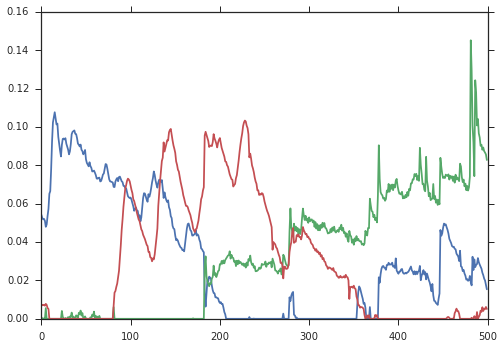

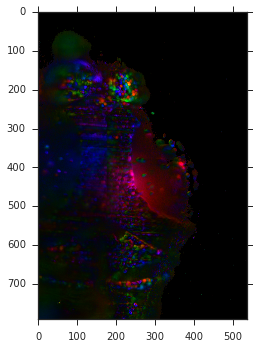

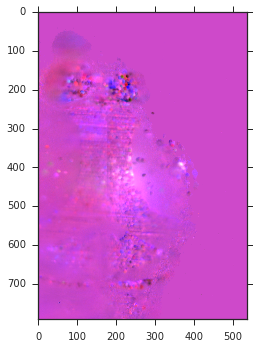

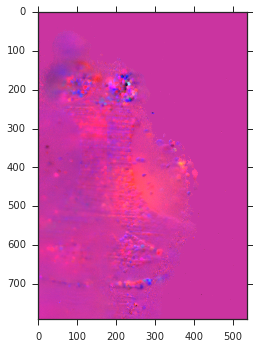

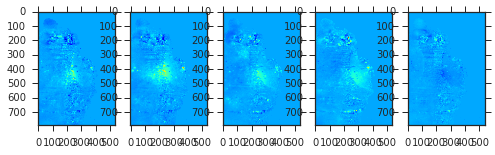

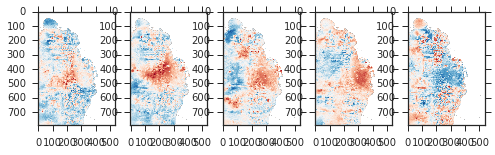

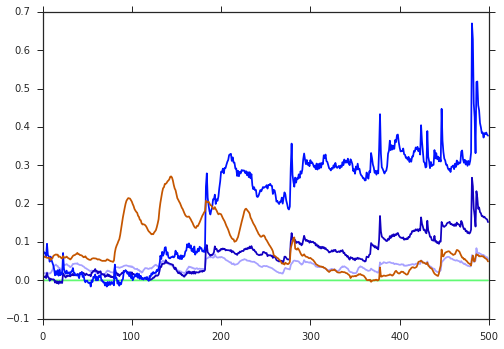

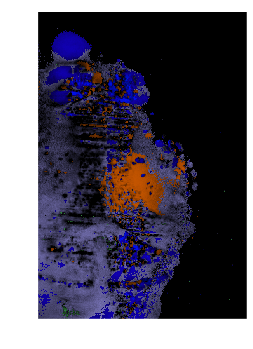

In [17]:
norm = corrected
test = np.zeros((5,500),dtype=np.int)
test[0,85:100]=1
test[1,130:145]=1
test[2,175:190]=1
test[3,220:235]=1
test[4,305:315]=1
test[4,325:335]=1
test[4,350:360]=1
test[4,370:380]=1
test[4,395:415]=1
norm = norm.toTimeSeries(size="64M")
norm=norm.squelch(1300).normalize(baseline='percentile')
norm.cache()
fig = figure(dpi=300)
model = NMF(k=3, maxIter=30).fit(norm)
plt.plot(model.h.T);
plt.savefig('/mnt/downloads/temp/NMF-2.png', dpi=300, bbox_inches='tight')
imgs = model.w.pack()
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"], scale=2).transform(imgs)
plt.imshow(maps);
plt.savefig('/mnt/downloads/temp/NMFb-2.png', dpi=300, bbox_inches='tight')
model = RegressionModel.load(test, "linear")
results = model.fit(norm)
betas=results.select('betas').pack()
fig = figure(dpi=300)
maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[0:3])
plt.imshow(maps)
plt.savefig('/mnt/downloads/temp/linreg-2.png', dpi=300, bbox_inches='tight')
if test.shape[0]>3:   
	fig = figure(dpi=300)
	lower=test.shape[0]-3
	upper=test.shape[0]        
	maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], scale=2).transform(betas[lower:upper])
	plt.imshow(maps)
	plt.savefig('/mnt/downloads/temp/linreg2-2.png', dpi=300, bbox_inches='tight')
vmin = amin(betas)
vmax = amax(betas)
fig = figure(dpi=300)
plt.subplots(1, test.shape[0], sharex=True, sharey=True)
for j in range(0,test.shape[0]):
	n=betas[j,]
	plt.subplot(1, test.shape[0], j+1);
	plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet')
plt.savefig('/mnt/downloads/temp/linregb-2.png', dpi=300, bbox_inches='tight')

fig = figure(dpi=300)
plt.subplots(1, test.shape[0], sharex=True, sharey=True)
for j in range(0,test.shape[0]):
	x = test[j]        
	corrs = norm.correlate(x)
	corrMat = center(corrs.pack())
	plt.subplot(1, test.shape[0], j+1);
	plt.imshow(corrMat, cmap='RdBu_r')
plt.savefig('/mnt/downloads/temp/correlation-2.png', dpi=300, bbox_inches='tight')

fig = figure(dpi=300)
model=KMeans(k=5).fit(norm)
newclrs = Colorize.optimize(model.centers, asCmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(model.centers.T);
plt.savefig('/mnt/downloads/temp/Kmeans5-2.png', dpi=300, bbox_inches='tight')
imgLabels = model.predict(norm).pack()
sim = model.similarity(norm)
imgSim = sim.pack()
brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
fig = figure(dpi=300)
image(brainmap)
plt.savefig('/mnt/downloads/temp/Kmeans5b-2.png', dpi=300, bbox_inches='tight')



In [13]:
norm = tsc.loadImages('/mnt/downloads/20150507crop/1/', inputFormat='tif')

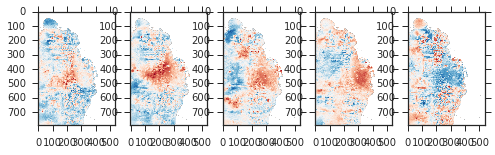

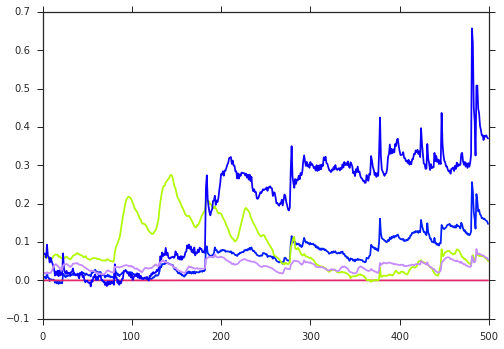

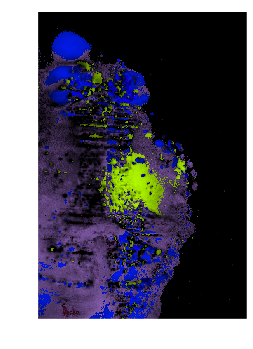

In [15]:
def center(m):
    y = m.copy()
    y[y>0] = y[y>0]/max(y[y>0])
    y[y<0] = y[y<0]/-min(y[y<0])
    return y

fig = figure(dpi=300)
plt.subplots(1, test.shape[0], sharex=True, sharey=True)
for j in range(0,test.shape[0]):
	x = test[j]        
	corrs = norm.correlate(x)
	corrMat = center(corrs.pack())
	plt.subplot(1, test.shape[0], j+1);
	plt.imshow(corrMat, cmap='RdBu_r')
plt.savefig('/mnt/downloads/temp/correlation-1.png', dpi=300, bbox_inches='tight')

fig = figure(dpi=300)
model=KMeans(k=5).fit(norm)
newclrs = Colorize.optimize(model.centers, asCmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(model.centers.T);
plt.savefig('/mnt/downloads/temp/Kmeans5-1.png', dpi=300, bbox_inches='tight')
imgLabels = model.predict(norm).pack()
sim = model.similarity(norm)
imgSim = sim.pack()
brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
fig = figure(dpi=300)
image(brainmap)
plt.savefig('/mnt/downloads/temp/Kmeans5b-1.png', dpi=300, bbox_inches='tight')